## SETUP

- pandas to be able to read data
- matplotlib to plot bar charts and basic histograms 
- seaborn to plot box charts easily and then subplots 
- sklearn for machine learning implementation

In [276]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

## DATA INGESTION

In [277]:
df = pd.read_csv("data/raw/UCI_Credit_Card.csv")

## DATA CLEANING

In [278]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [279]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [281]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- Checking variation of credit card limit 

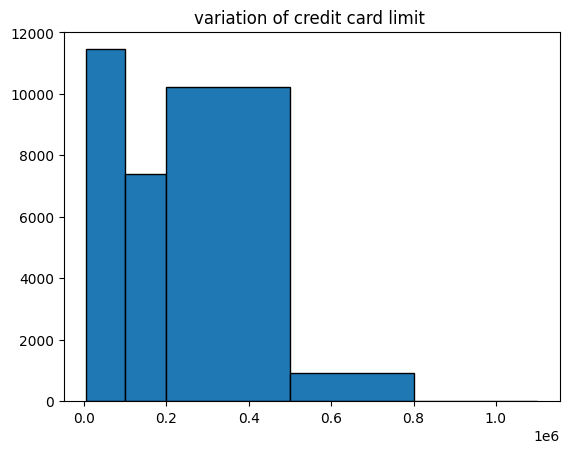

In [282]:
values = [df.LIMIT_BAL]
bins = [5000, 100000, 200000, 500000, 800000, 1100000]
plt.hist(values, bins, edgecolor = 'black')
plt.title("variation of credit card limit ")
plt.show()

### checking unique values of cols

In [283]:
exclude_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for column in df.columns:
    if column not in exclude_columns:
        unique_values = df[column].unique()
        print(f"Unique values in {column}: {unique_values}")

Unique values in ID: [    1     2     3 ... 29998 29999 30000]
Unique values in SEX: [2 1]
Unique values in EDUCATION: [2 1 3 5 4 6 0]
Unique values in MARRIAGE: [1 2 3 0]
Unique values in PAY_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]
Unique values in PAY_2: [ 2  0 -1 -2  3  5  7  4  1  6  8]
Unique values in PAY_3: [-1  0  2 -2  3  4  6  7  1  5  8]
Unique values in PAY_4: [-1  0 -2  2  3  4  5  7  6  1  8]
Unique values in PAY_5: [-2  0 -1  2  3  5  4  7  8  6]
Unique values in PAY_6: [-2  2  0 -1  3  6  4  7  8  5]
Unique values in default.payment.next.month: [1 0]


### checking for null

In [284]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### replacing the numeric entry values with actual 

- changing sex given as 1 to M , 2 to F
- have to change it to string type for it to accept this cmd


In [285]:
change = {'1':'M', '2':'F'}
df['SEX'] = df['SEX'].astype(str).replace(change)  

- since 6 and 5 both are unknowns, changing 6 to 5

In [286]:
df['EDUCATION'] = df['EDUCATION'].replace({6:5})

- nothing is given about 0 hence changed it to 3

In [287]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})

- changed [1 to married] [2 to single] [3 to others]

In [288]:
df['MARRIAGE'] = df['MARRIAGE'].astype(str).replace({'1':'married', '2':'single', '3':'others'})

### Renaming the Attributes

- PAY_(x) --> PAY_(month)  

In [289]:
df.rename(columns={'PAY_0':'REPAY_SEPT','PAY_2':'REPAY_AUG', 'PAY_3':'REPAY_JUL', 'PAY_4':'REPAY_JUN', 'PAY_5':'REPAY_MAY', 'PAY_6':'REPAY_APR' }, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


- BILL_AMT(x) --> BILL_(month)

In [290]:
df.rename(columns={'BILL_AMT1':'BILL_SEPT', 'BILL_AMT2':'BILL_AUG', 'BILL_AMT3':'BILL_JUL', 'BILL_AMT4':'BILL_JUN', 'BILL_AMT5':'BILL_MAY', 'BILL_AMT6':'BILL_APR'}, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


- PAY_AMT(x) --> PAID_(month)

In [291]:
df.rename(columns={'PAY_AMT1':'PAID_SEPT', 'PAY_AMT2':'PAID_AUG', 'PAY_AMT3':'PAID_JUL', 'PAY_AMT4':'PAID_JUN', 'PAY_AMT5':'PAID_MAY', 'PAY_AMT6':'PAID_APR'}, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### finding correlation

- no inference from correlation 

<Axes: >

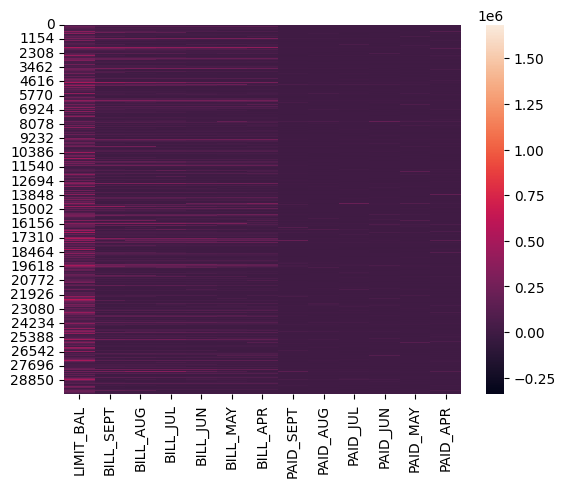

In [292]:
selected_float_columns = df.select_dtypes(include='float')
correlation_matrix = selected_float_columns.corr()
sns.heatmap(selected_float_columns)


## FEATURE ENGINEERING

### sum of repay_(month)

- found rows with highest sum, ie, rows with highest default

In [293]:
cols_sum = ['REPAY_SEPT', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY', 'REPAY_APR']
df['Repay_Sum'] = df[cols_sum].sum(axis=1)

- boxplot to check where the median of sums lie

<Axes: xlabel='default.payment.next.month', ylabel='Repay_Sum'>

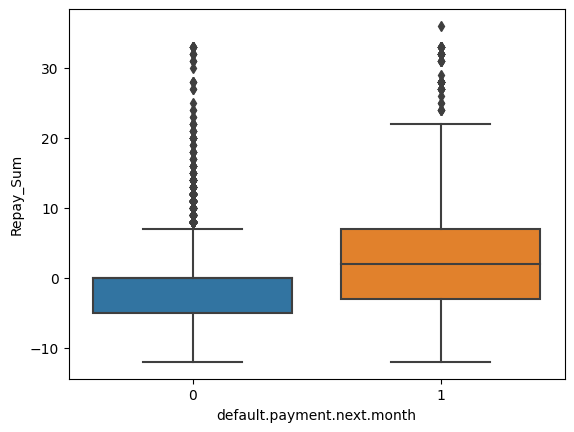

In [294]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Repay_Sum)

- representation of people default groups

In [295]:
minNo = 30
filter_df = df[df['Repay_Sum']>=minNo] 
print("number of people with more than 30 months of default:", filter_df.shape[0] )

minNo2 = 20
filter_df1 = df[(df['Repay_Sum']>=minNo2)&(df['Repay_Sum']<minNo)] 
print("number of people with more than 20 months but less than 30 months of default:", filter_df1.shape[0]) 

minNo3 = 10
filter_df2 = df[(df['Repay_Sum']>=minNo3)&(df['Repay_Sum']<minNo2)] 
print("number of people with more than 10 months but less than 20 months of default:", filter_df2.shape[0] )

minNo4 = 0
filter_df3 = df[(df['Repay_Sum']>=minNo4)&(df['Repay_Sum']<minNo3)] 
print("number of people with more than 0 months but less than 10 months of default:", filter_df3.shape[0])

number of people with more than 30 months of default: 50
number of people with more than 20 months but less than 30 months of default: 97
number of people with more than 10 months but less than 20 months of default: 1470
number of people with more than 0 months but less than 10 months of default: 15708


- graphical representation of people default groups 

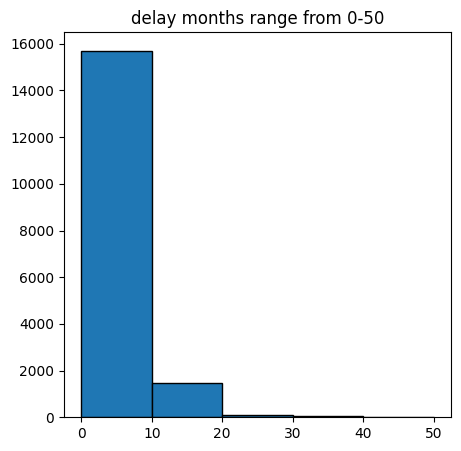

In [296]:
plt.figure(figsize=(5,5))
bins = [0,10,20,30,40,50]
plt.hist(df.Repay_Sum, bins, edgecolor = 'black')
plt.title('delay months range from 0-50')
plt.show()

### mean of repay_(month)

- found highest mean of deafult

In [297]:
cols_sum = ['REPAY_SEPT', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY', 'REPAY_APR']
df['Repay_mean'] = df[cols_sum].mean(axis=1)

- boxplot to check where the median of means lie
- it shows that the median of sums and means is similar 

<Axes: xlabel='default.payment.next.month', ylabel='Repay_mean'>

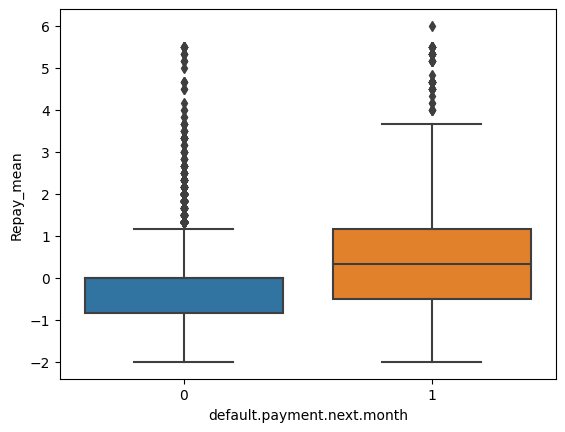

In [298]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Repay_mean)

- checking median of deafults with respect to sex and repayment means
- median is similar can't use

<Axes: xlabel='default.payment.next.month', ylabel='Repay_mean'>

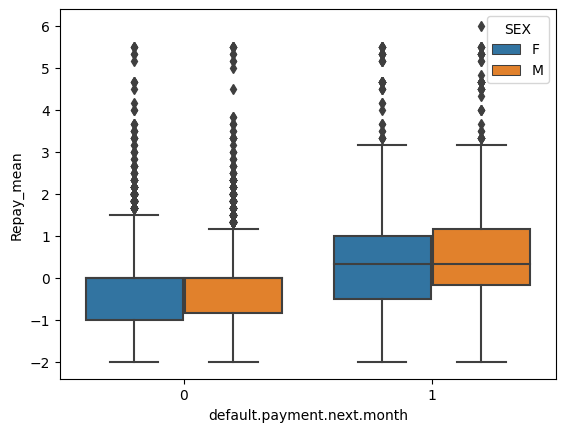

In [299]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Repay_mean, hue= df.SEX)

- checking median of deafults with respect to education and repayment means
- median for university and high school is higher 

<Axes: xlabel='default.payment.next.month', ylabel='Repay_mean'>

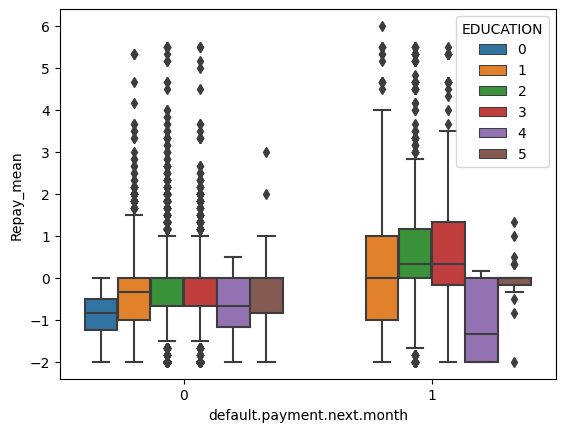

In [300]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Repay_mean, hue= df.EDUCATION)

- checking median of deafults with respect to marriage and repayment means
- median is similar so can't use

<Axes: xlabel='default.payment.next.month', ylabel='Repay_mean'>

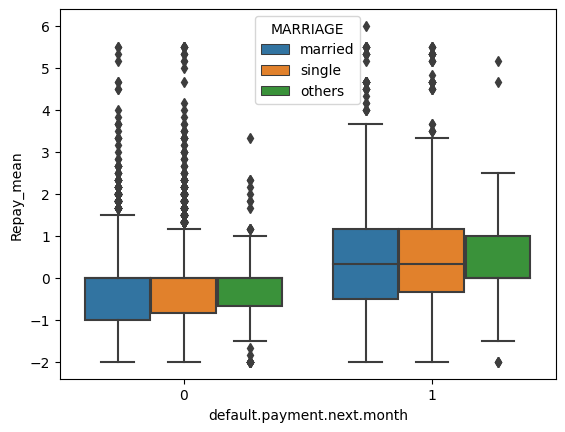

In [301]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Repay_mean, hue= df.MARRIAGE)

## Prob of default with demographics 

### Default based on age

- median is similar so can't use

<Axes: xlabel='default.payment.next.month', ylabel='AGE'>

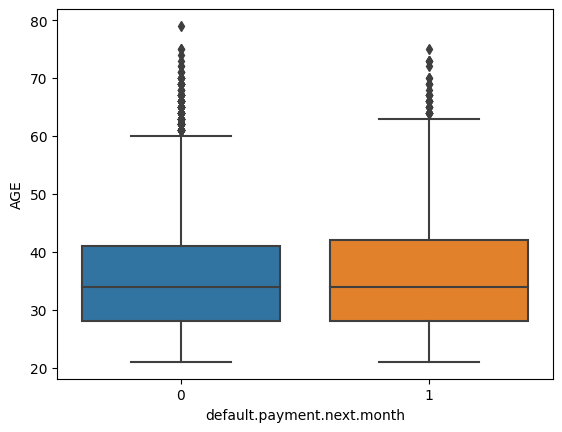

In [302]:
sns.boxplot(data=df, x = df['default.payment.next.month'], y = df['AGE'], orient='v')

### default based on age and sex

- male defaulters have higher median

<Axes: xlabel='default.payment.next.month', ylabel='AGE'>

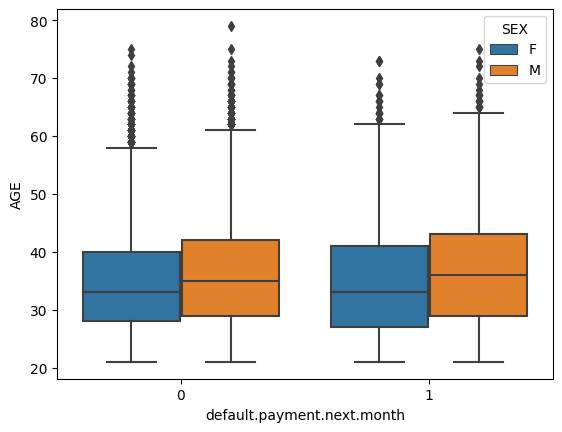

In [303]:
sns.boxplot(data=df, x = df['default.payment.next.month'], y = df['AGE'], orient='v', hue = df['SEX'])

- median for high school is highest, therefore age of highschool is highest

<Axes: xlabel='default.payment.next.month', ylabel='AGE'>

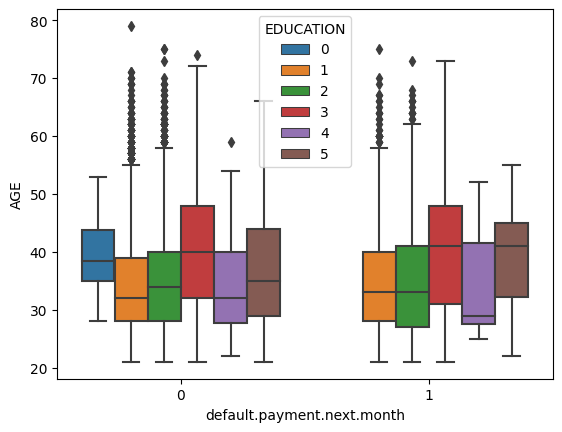

In [304]:
sns.boxplot(data=df, x = df['default.payment.next.month'], y = df['AGE'], orient='v', hue = df['EDUCATION'])

- median credit limit of highschool is minimum

<Axes: xlabel='default.payment.next.month', ylabel='LIMIT_BAL'>

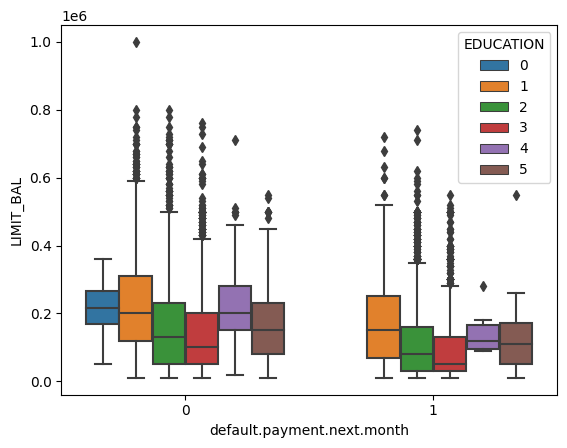

In [305]:
sns.boxplot(data=df, x = df['default.payment.next.month'], y = df['LIMIT_BAL'], orient='v', hue = df['EDUCATION'])

## default based on sex

- number of women in data is more than men

Text(0.5, 1.0, 'Men and Women count in Data')

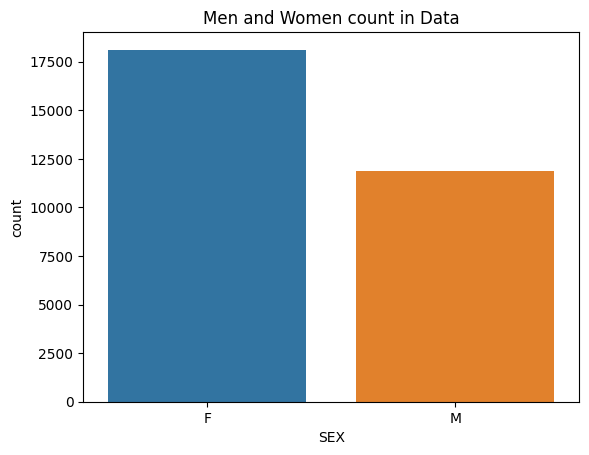

In [306]:
sns.countplot(data=df, x= df['SEX'])
plt.title("Men and Women count in Data")

### women

- finding total number of women defaulted 
- finding percentage of women defaulting among total women

In [307]:
women = df[(df['default.payment.next.month'] == 1) & (df.SEX=='F')]
print("total no of women defaulters:", women.shape[0])

percent_F_def = (women.shape[0]/df[df['SEX']=='F'].shape[0])*100
print("percentage of women defaulters:", percent_F_def)

total no of women defaulters: 3763
percentage of women defaulters: 20.776280918727917


- graphical representation of relationship status of defaulting women

Text(0.5, 1.0, 'Relationship Status of Defaulting Women')

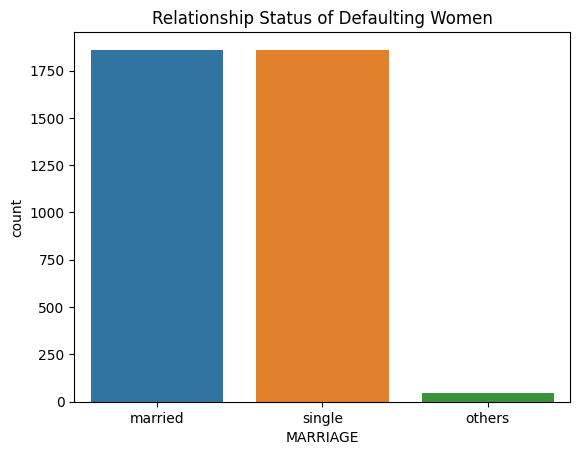

In [308]:
sns.countplot(x= women['MARRIAGE'])
plt.title("Relationship Status of Defaulting Women")

#### married

- no of married women among total women defaluters

In [309]:
mwomen = women[women.MARRIAGE=='married']
mwomen.shape[0]

1860

Text(0.5, 1.0, 'Number of Educated Married Women')

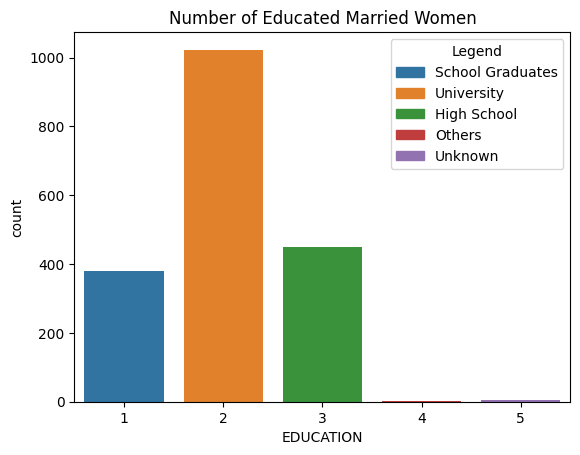

In [310]:
mwomen_graph = sns.countplot(x= mwomen['EDUCATION'])

legend_labels = ['School Graduates', 'University', 'High School', 'Others', 'Unknown']

handles = [plt.Rectangle((0,0),1,1, color=mwomen_graph.patches[i].get_facecolor()) for i in range(len(legend_labels))]
plt.legend(handles, legend_labels, title='Legend')


plt.title("Number of Educated Married Women")


#### single

- total single women defaulters 

In [311]:
swomen = women[women.MARRIAGE=='single']
swomen.shape[0]

1856

Text(0.5, 1.0, 'Number of Educated Single Women')

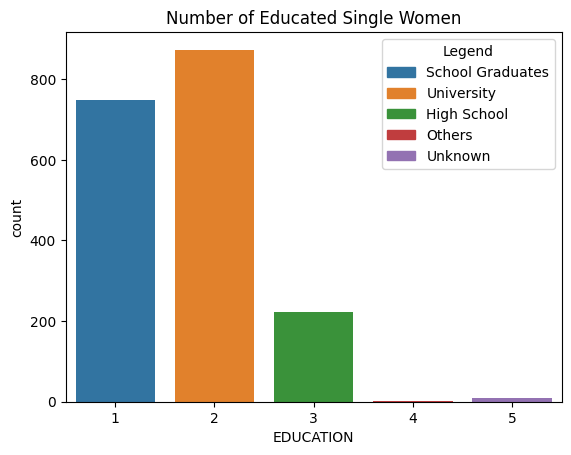

In [312]:
swomen_graph = sns.countplot(x= swomen['EDUCATION'])

legend_labels = ['School Graduates', 'University', 'High School', 'Others', 'Unknown']

handles = [plt.Rectangle((0,0),1,1, color=swomen_graph.patches[i].get_facecolor()) for i in range(len(legend_labels))]
plt.legend(handles, legend_labels, title='Legend')


plt.title("Number of Educated Single Women")

### men 

- finding total number of men defaulted 
- finding percentage of men defaulting among total men

In [313]:
men = df[(df['default.payment.next.month'] == 1) & (df.SEX=='M')]
print("total no of men defaulters:", men.shape[0])

percent_M_def = (men.shape[0]/df[df['SEX']=='M'].shape[0])*100
print("percentage of men defaulters:", percent_M_def)

total no of men defaulters: 2873
percentage of men defaulters: 24.16722745625841


- graphical representation of relationship status of defaulting men

Text(0.5, 1.0, 'Relationship Status of Defaulting Men')

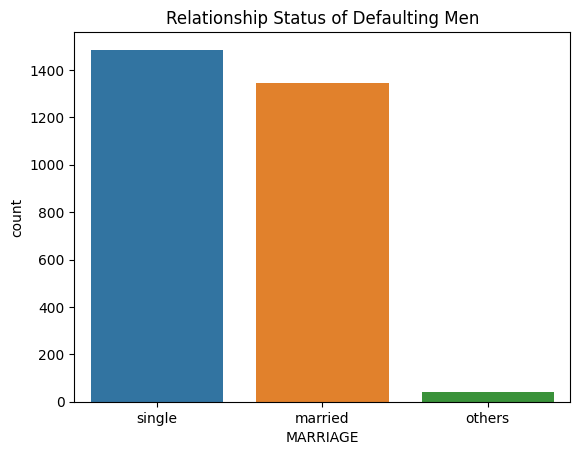

In [314]:
sns.countplot(x= men['MARRIAGE'])
plt.title("Relationship Status of Defaulting Men")

#### married

- no of married men among total women defaluters

In [315]:
mmen = men[men.MARRIAGE=='married']
men.shape[0]

2873

Text(0.5, 1.0, 'Number of Educated Married Men')

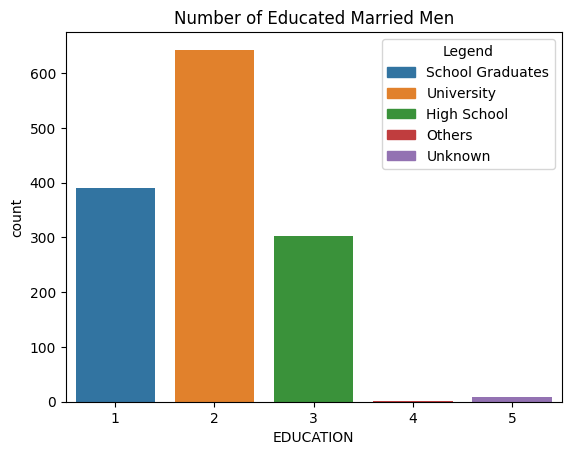

In [316]:
mmen_graph = sns.countplot(x= mmen['EDUCATION'])

legend_labels = ['School Graduates', 'University', 'High School', 'Others', 'Unknown']

handles = [plt.Rectangle((0,0),1,1, color=mmen_graph.patches[i].get_facecolor()) for i in range(len(legend_labels))]
plt.legend(handles, legend_labels, title='Legend')


plt.title("Number of Educated Married Men")


#### single 

- total single men defaulters 

In [317]:
smen = men[men.MARRIAGE=='single']
smen.shape[0]

1485

Text(0.5, 1.0, 'Number of Educated Single Men')

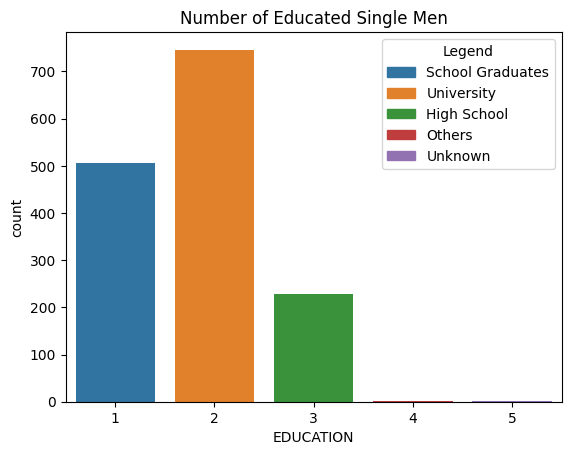

In [318]:
smen_graph = sns.countplot(x= smen['EDUCATION'])

legend_labels = ['School Graduates', 'University', 'High School', 'Others', 'Unknown']

handles = [plt.Rectangle((0,0),1,1, color=smen_graph.patches[i].get_facecolor()) for i in range(len(legend_labels))]
plt.legend(handles, legend_labels, title='Legend')


plt.title("Number of Educated Single Men")


- combining the graphs

## default based on education

- university defaulters

In [326]:
edu_uni = df[(df.EDUCATION== 2)]     
print("total university data:", edu_uni.shape[0])  

total_uni_def = df[(df.EDUCATION==2)&(df['default.payment.next.month']==1)&(df.MARRIAGE != 'others')].shape[0]
print("total university defaulters:", total_uni_def)
percentage2 = (total_uni_def/edu_uni.shape[0])*100
print("percentage of uni defaulters: ",percentage2)

total university data: 14030
total university defaulters: 3285
percentage of uni defaulters:  23.414112615823235


- high school defaulters

In [327]:
edu_high = df[(df.EDUCATION== 3)]                 
print("total highschool data:", edu_high.shape[0])

total_hschool_def = df[(df.EDUCATION==3)&(df['default.payment.next.month']==1)&(df.MARRIAGE != 'others')].shape[0]
print("total highschool defaulters:", total_hschool_def)
percentage3 = (total_hschool_def/edu_high.shape[0])*100
print("percentage of highschool defaulters: ",percentage3)

total highschool data: 4917
total highschool defaulters: 1206
percentage of highschool defaulters:  24.527150701647347


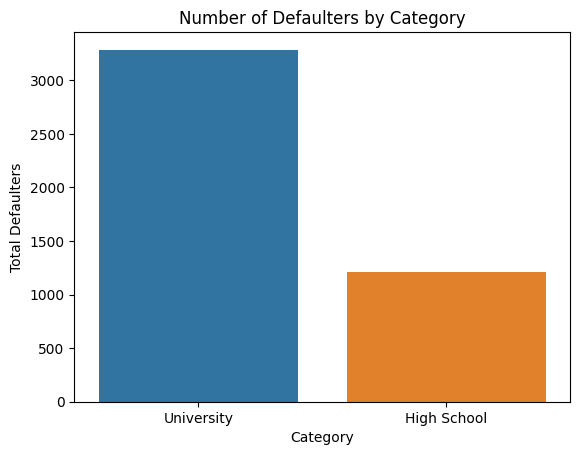

In [331]:
data = {
    'Category': ['University', 'High School'],
    'Total Data': [edu_uni.shape[0], edu_high.shape[0]],
    'Total Defaulters': [total_uni_def, total_hschool_def],
    'Percentage of Defaulters': [percentage2, percentage3]
}

df_plot = pd.DataFrame(data)

sns.barplot(data=df_plot, x='Category', y='Total Defaulters')

plt.xlabel('Category')
plt.ylabel('Total Defaulters')
plt.title('Number of Defaulters by Category')

plt.show()


## DATA TRANSFORMATION

- transforming wide data to long data for repayment status 

In [ ]:
long_df = df.melt(id_vars=['default.payment.next.month'], value_vars=['REPAY_APR','REPAY_MAY','REPAY_JUN','REPAY_JUL','REPAY_AUG','REPAY_SEPT'], var_name= 'metric', value_name='delay')
print(long_df)


        default.payment.next.month      metric  delay
0                                1   REPAY_APR     -2
1                                1   REPAY_APR      2
2                                0   REPAY_APR      0
3                                0   REPAY_APR      0
4                                0   REPAY_APR      0
...                            ...         ...    ...
179995                           0  REPAY_SEPT      0
179996                           0  REPAY_SEPT     -1
179997                           1  REPAY_SEPT      4
179998                           1  REPAY_SEPT      1
179999                           1  REPAY_SEPT      0

[180000 rows x 3 columns]


- repayment in sept is delayed increasing chances of default in next month

<Axes: xlabel='metric', ylabel='delay'>

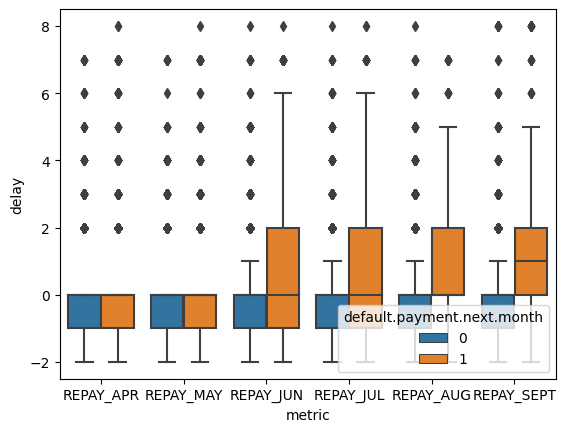

In [ ]:
sns.boxplot(x = long_df['metric'], y= long_df.delay, hue=long_df['default.payment.next.month'])

- transforming wide data to long data for bill amount

In [ ]:
long_df1 = df.melt(id_vars=['default.payment.next.month'] , value_vars=['BILL_APR','BILL_MAY','BILL_JUN','BILL_JUL','BILL_AUG','BILL_SEPT'], var_name= 'metric', value_name='amount')
print(long_df1)

        default.payment.next.month     metric    amount
0                                1   BILL_APR       0.0
1                                1   BILL_APR    3261.0
2                                0   BILL_APR   15549.0
3                                0   BILL_APR   29547.0
4                                0   BILL_APR   19131.0
...                            ...        ...       ...
179995                           0  BILL_SEPT  188948.0
179996                           0  BILL_SEPT    1683.0
179997                           1  BILL_SEPT    3565.0
179998                           1  BILL_SEPT   -1645.0
179999                           1  BILL_SEPT   47929.0

[180000 rows x 3 columns]


- the data is skewed

<Axes: xlabel='metric', ylabel='amount'>

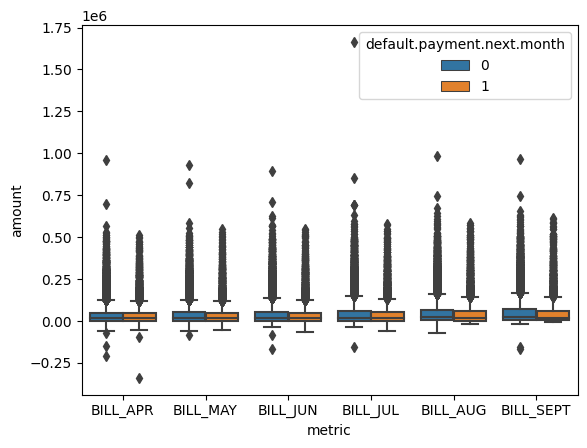

In [ ]:
sns.boxplot(long_df1, x='metric', y = 'amount', hue='default.payment.next.month')

- transforming wide data to long data for paid amount 

In [ ]:
long_df2 = df.melt(id_vars=['default.payment.next.month'], value_vars=['PAID_APR','PAID_MAY','PAID_JUN','PAID_JUL','PAID_AUG','PAID_SEPT'], var_name= 'metric', value_name='amount')
print(long_df2)

        default.payment.next.month     metric   amount
0                                1   PAID_APR      0.0
1                                1   PAID_APR   2000.0
2                                0   PAID_APR   5000.0
3                                0   PAID_APR   1000.0
4                                0   PAID_APR    679.0
...                            ...        ...      ...
179995                           0  PAID_SEPT   8500.0
179996                           0  PAID_SEPT   1837.0
179997                           1  PAID_SEPT      0.0
179998                           1  PAID_SEPT  85900.0
179999                           1  PAID_SEPT   2078.0

[180000 rows x 3 columns]


- the data is highly skewed

<Axes: xlabel='metric', ylabel='amount'>

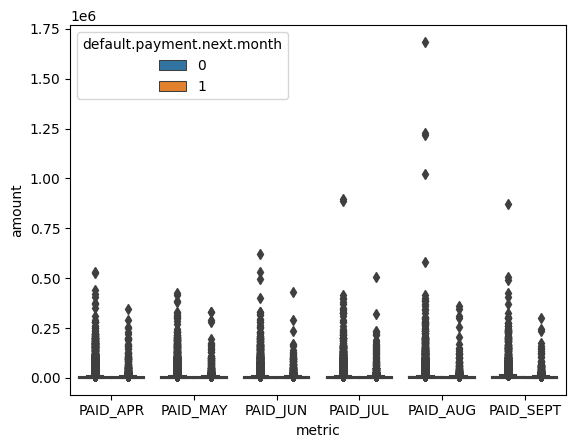

In [ ]:
sns.boxplot(long_df2, x='metric',y='amount', hue='default.payment.next.month')

### Creating Subplot 

- interpreting the repayment status relation to defaluts further 

d:\source\repos\OrionDataAnalyticsInternshipJul23\Orion.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


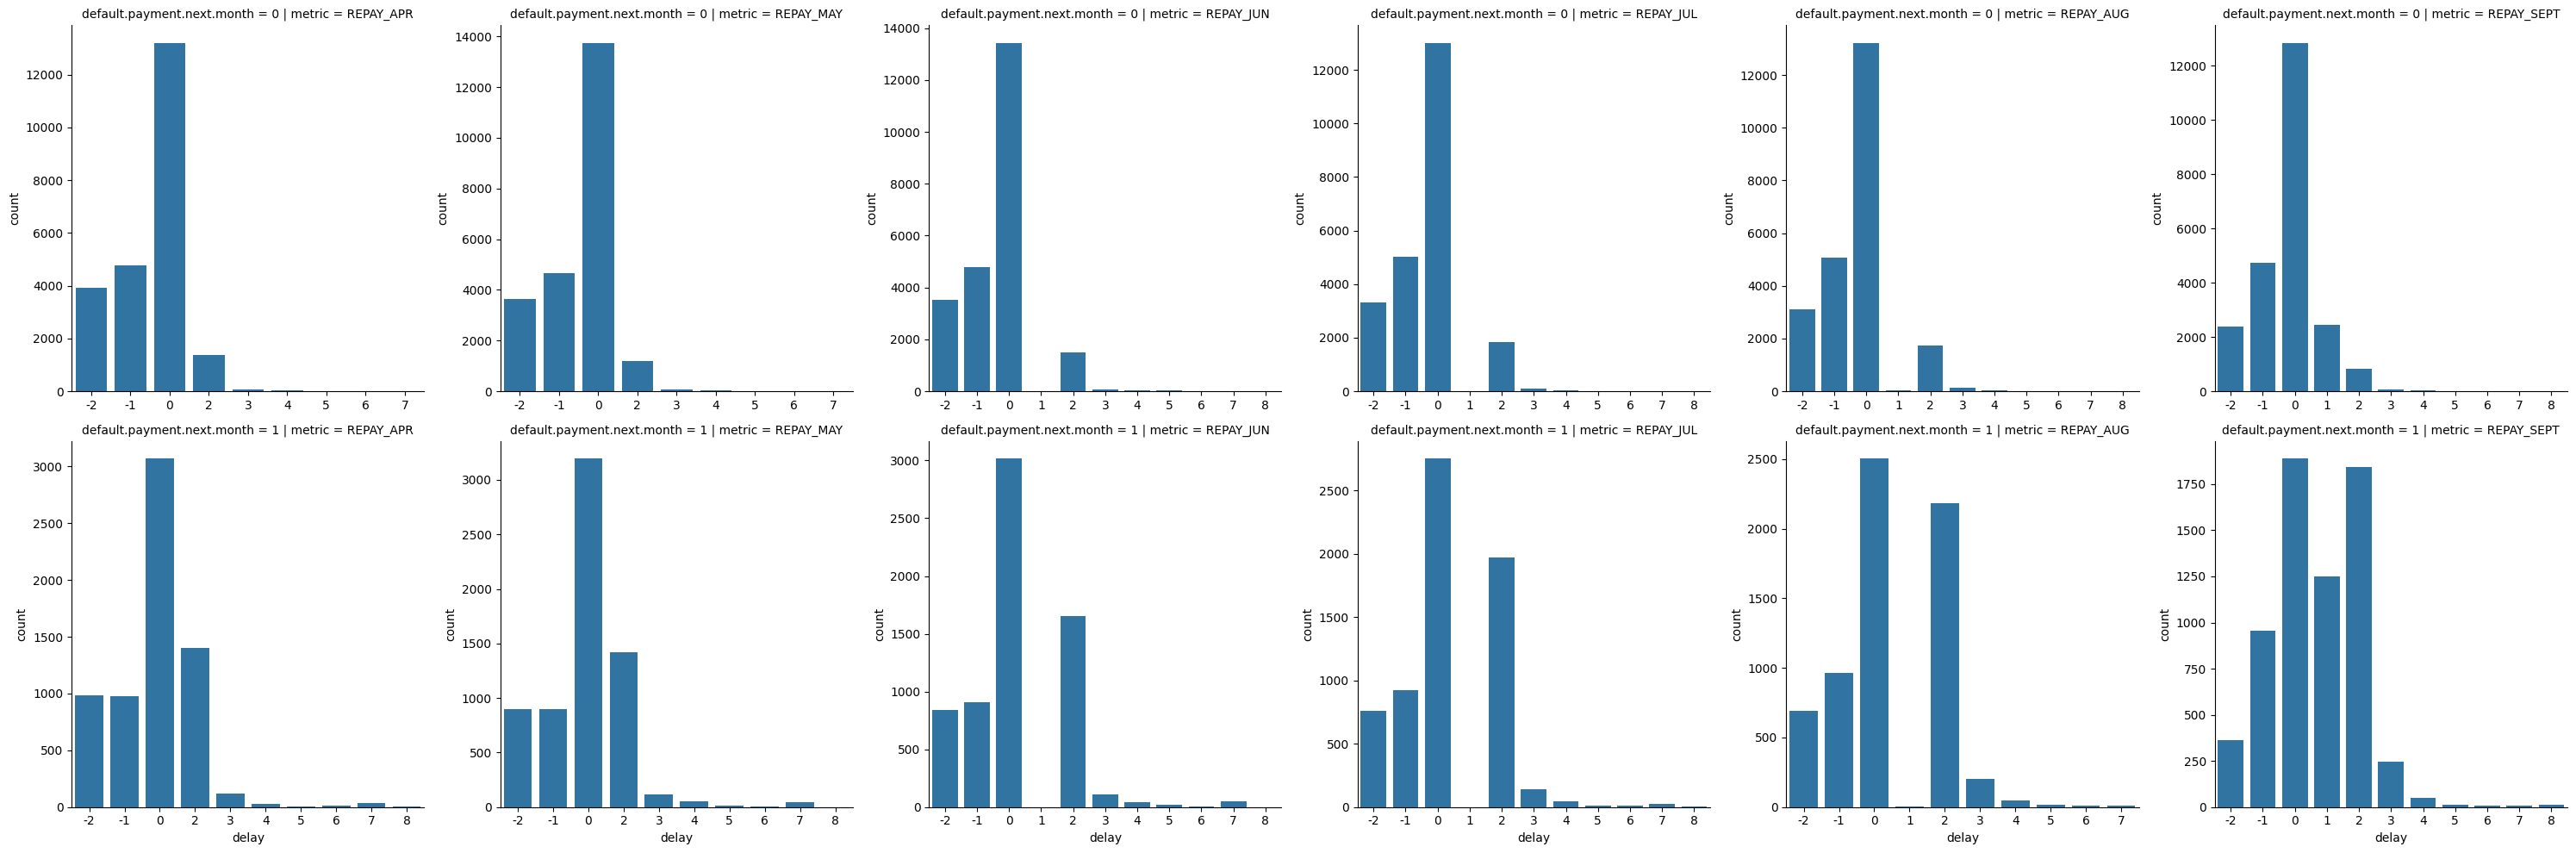

In [ ]:
g = sns.FacetGrid(long_df, row='default.payment.next.month', col='metric', sharex=False, sharey=False, height=5)
g.map_dataframe(sns.countplot, x='delay')

- interpreting the bill amounts relation to defaluts further 

d:\source\repos\OrionDataAnalyticsInternshipJul23\Orion.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


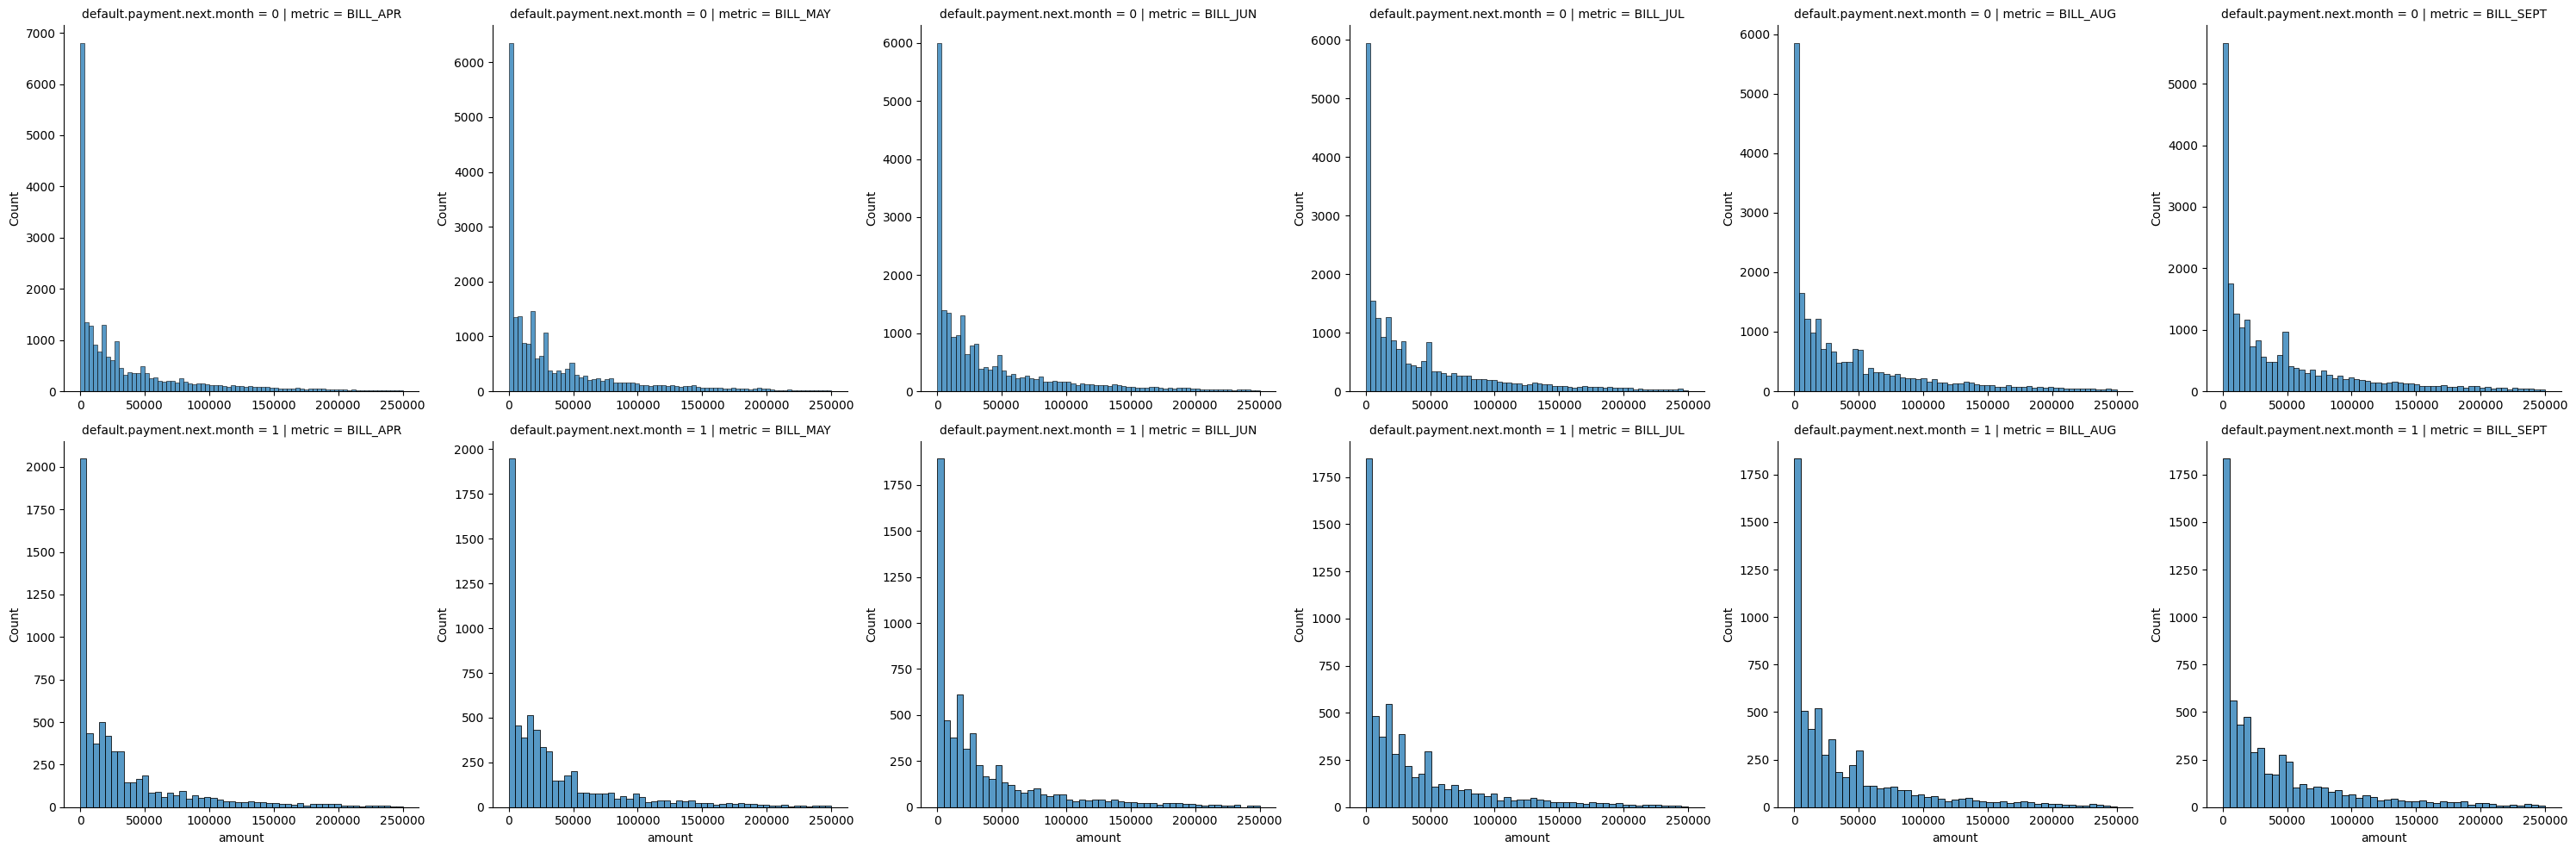

In [ ]:
g = sns.FacetGrid(long_df1, row='default.payment.next.month', col='metric', sharex=False, sharey=False, height=5)
g.map_dataframe(sns.histplot, x='amount', binrange=(0,250000))


- interpreting the paid amounts relation to defaluts further 

d:\source\repos\OrionDataAnalyticsInternshipJul23\Orion.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


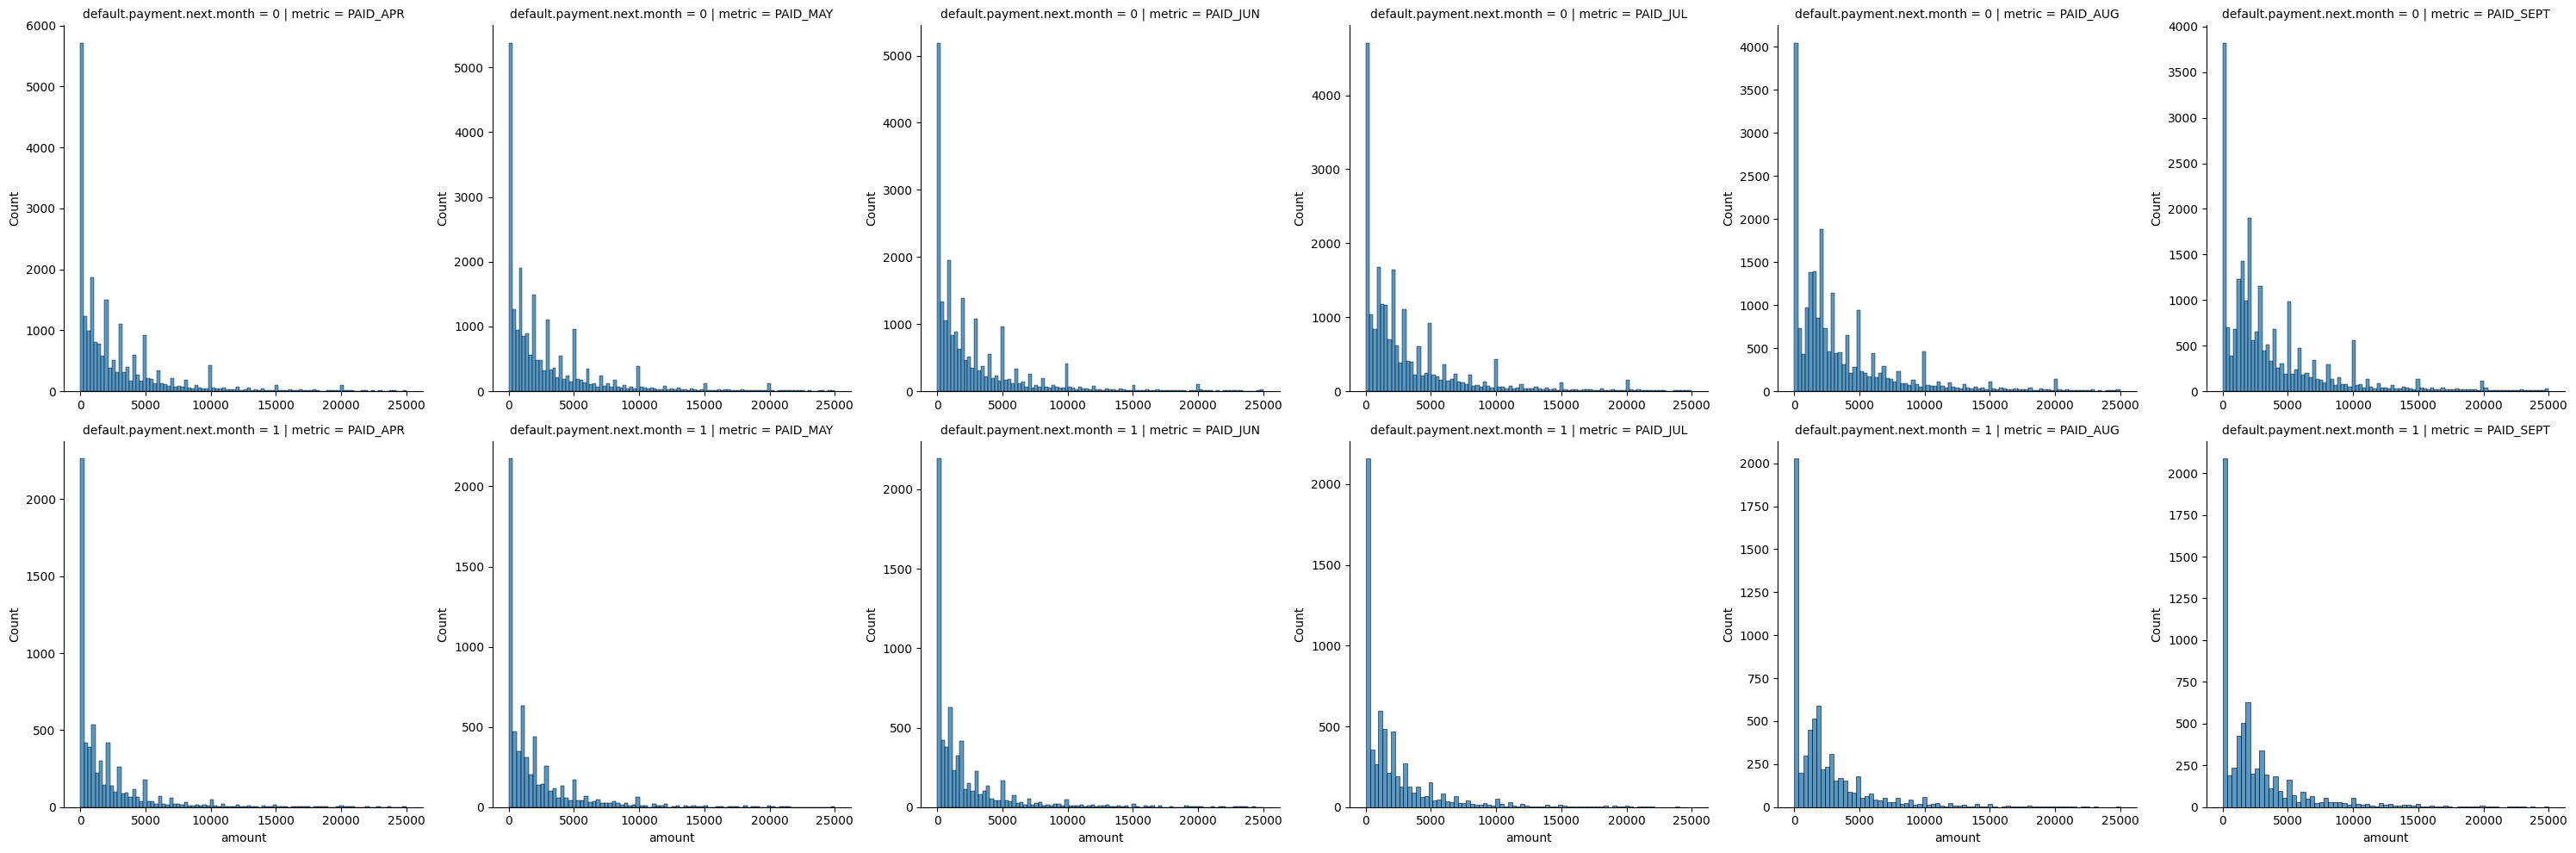

In [ ]:
g = sns.FacetGrid(long_df2, row='default.payment.next.month', col='metric', sharex=False, sharey=False, height=5)
g.map_dataframe(sns.histplot, x='amount', binrange=(0,25000))
